# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import smogn

In [2]:
df = pd.read_csv("data/dataset.csv")
df

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

**The dataset has 114,000 data and 20 features.**

Next, we will clean the data by 
- Excluding duplicate songs: As the same song can have different variations, we drop only the same `track_id`.
- Dropping unstructured data: `track_id`, `artists`, `album_name`, `track_name`, `track_genre`.

In [3]:
unstructured = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
categorical = ['explicit', 'mode', 'key', 'time_signature']

clean_df = df.drop_duplicates(subset = "track_id", ignore_index=True).drop(unstructured, axis=1)

In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89741 entries, 0 to 89740
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        89741 non-null  int64  
 1   duration_ms       89741 non-null  int64  
 2   explicit          89741 non-null  bool   
 3   danceability      89741 non-null  float64
 4   energy            89741 non-null  float64
 5   key               89741 non-null  int64  
 6   loudness          89741 non-null  float64
 7   mode              89741 non-null  int64  
 8   speechiness       89741 non-null  float64
 9   acousticness      89741 non-null  float64
 10  instrumentalness  89741 non-null  float64
 11  liveness          89741 non-null  float64
 12  valence           89741 non-null  float64
 13  tempo             89741 non-null  float64
 14  time_signature    89741 non-null  int64  
dtypes: bool(1), float64(9), int64(5)
memory usage: 9.7 MB


---

## Data Distribution

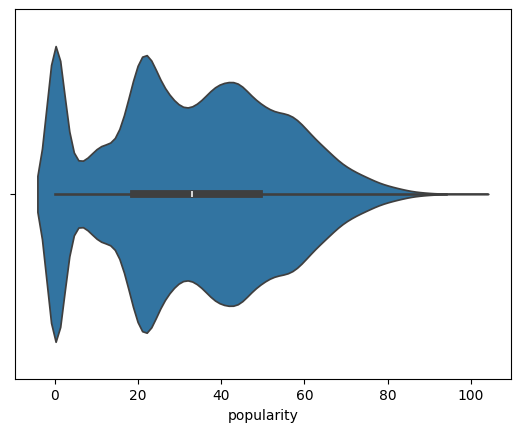

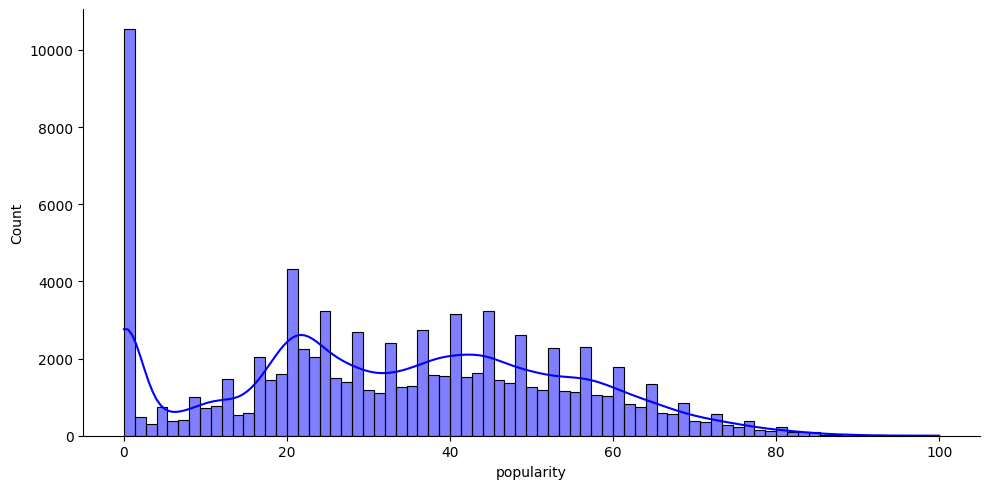

In [26]:
sb.violinplot(x=clean_df['popularity'])
sb.displot(data=clean_df, color='b', x="popularity", kde=True, aspect=2)

The graphs above illustrate the imbalance of `popularity` distribution.

---

## Correlation between `popularity` and other features

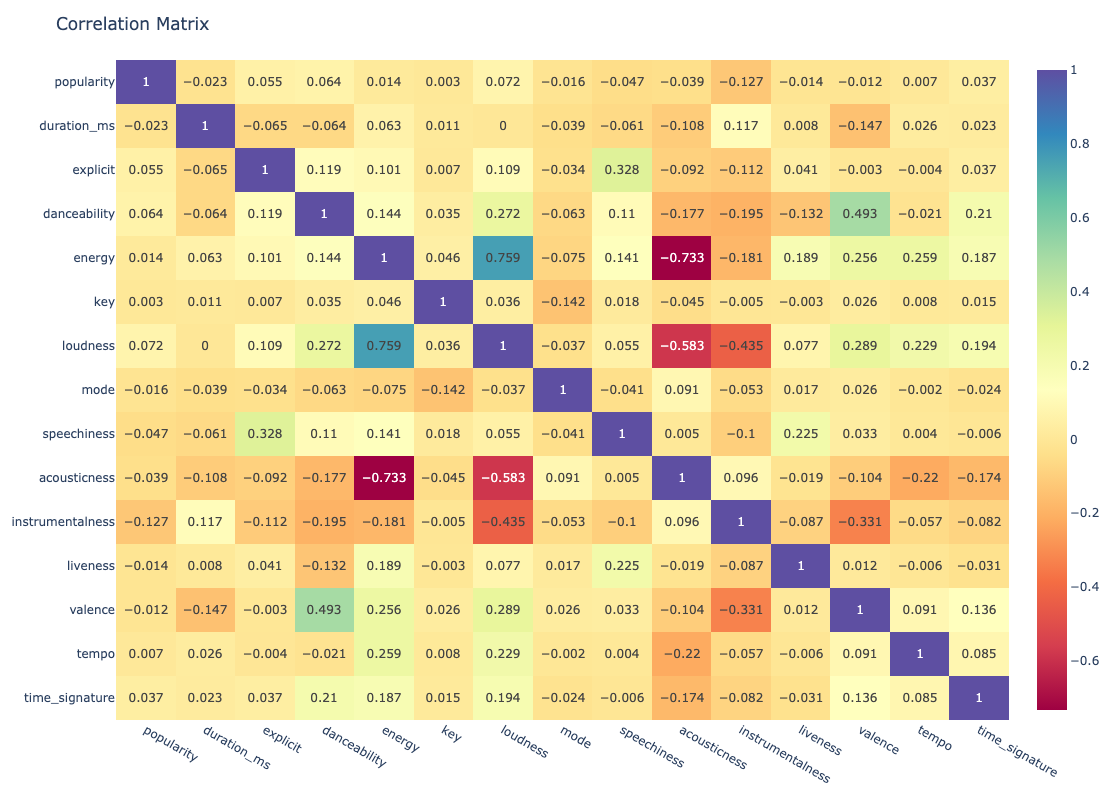

In [6]:
import plotly.express as px

fig = px.imshow(clean_df.corr().round(decimals=3), text_auto=True, aspect="auto", color_continuous_scale='spectral')
fig.update_layout(height=800, width=900, title_text='Correlation Matrix')
fig.show()

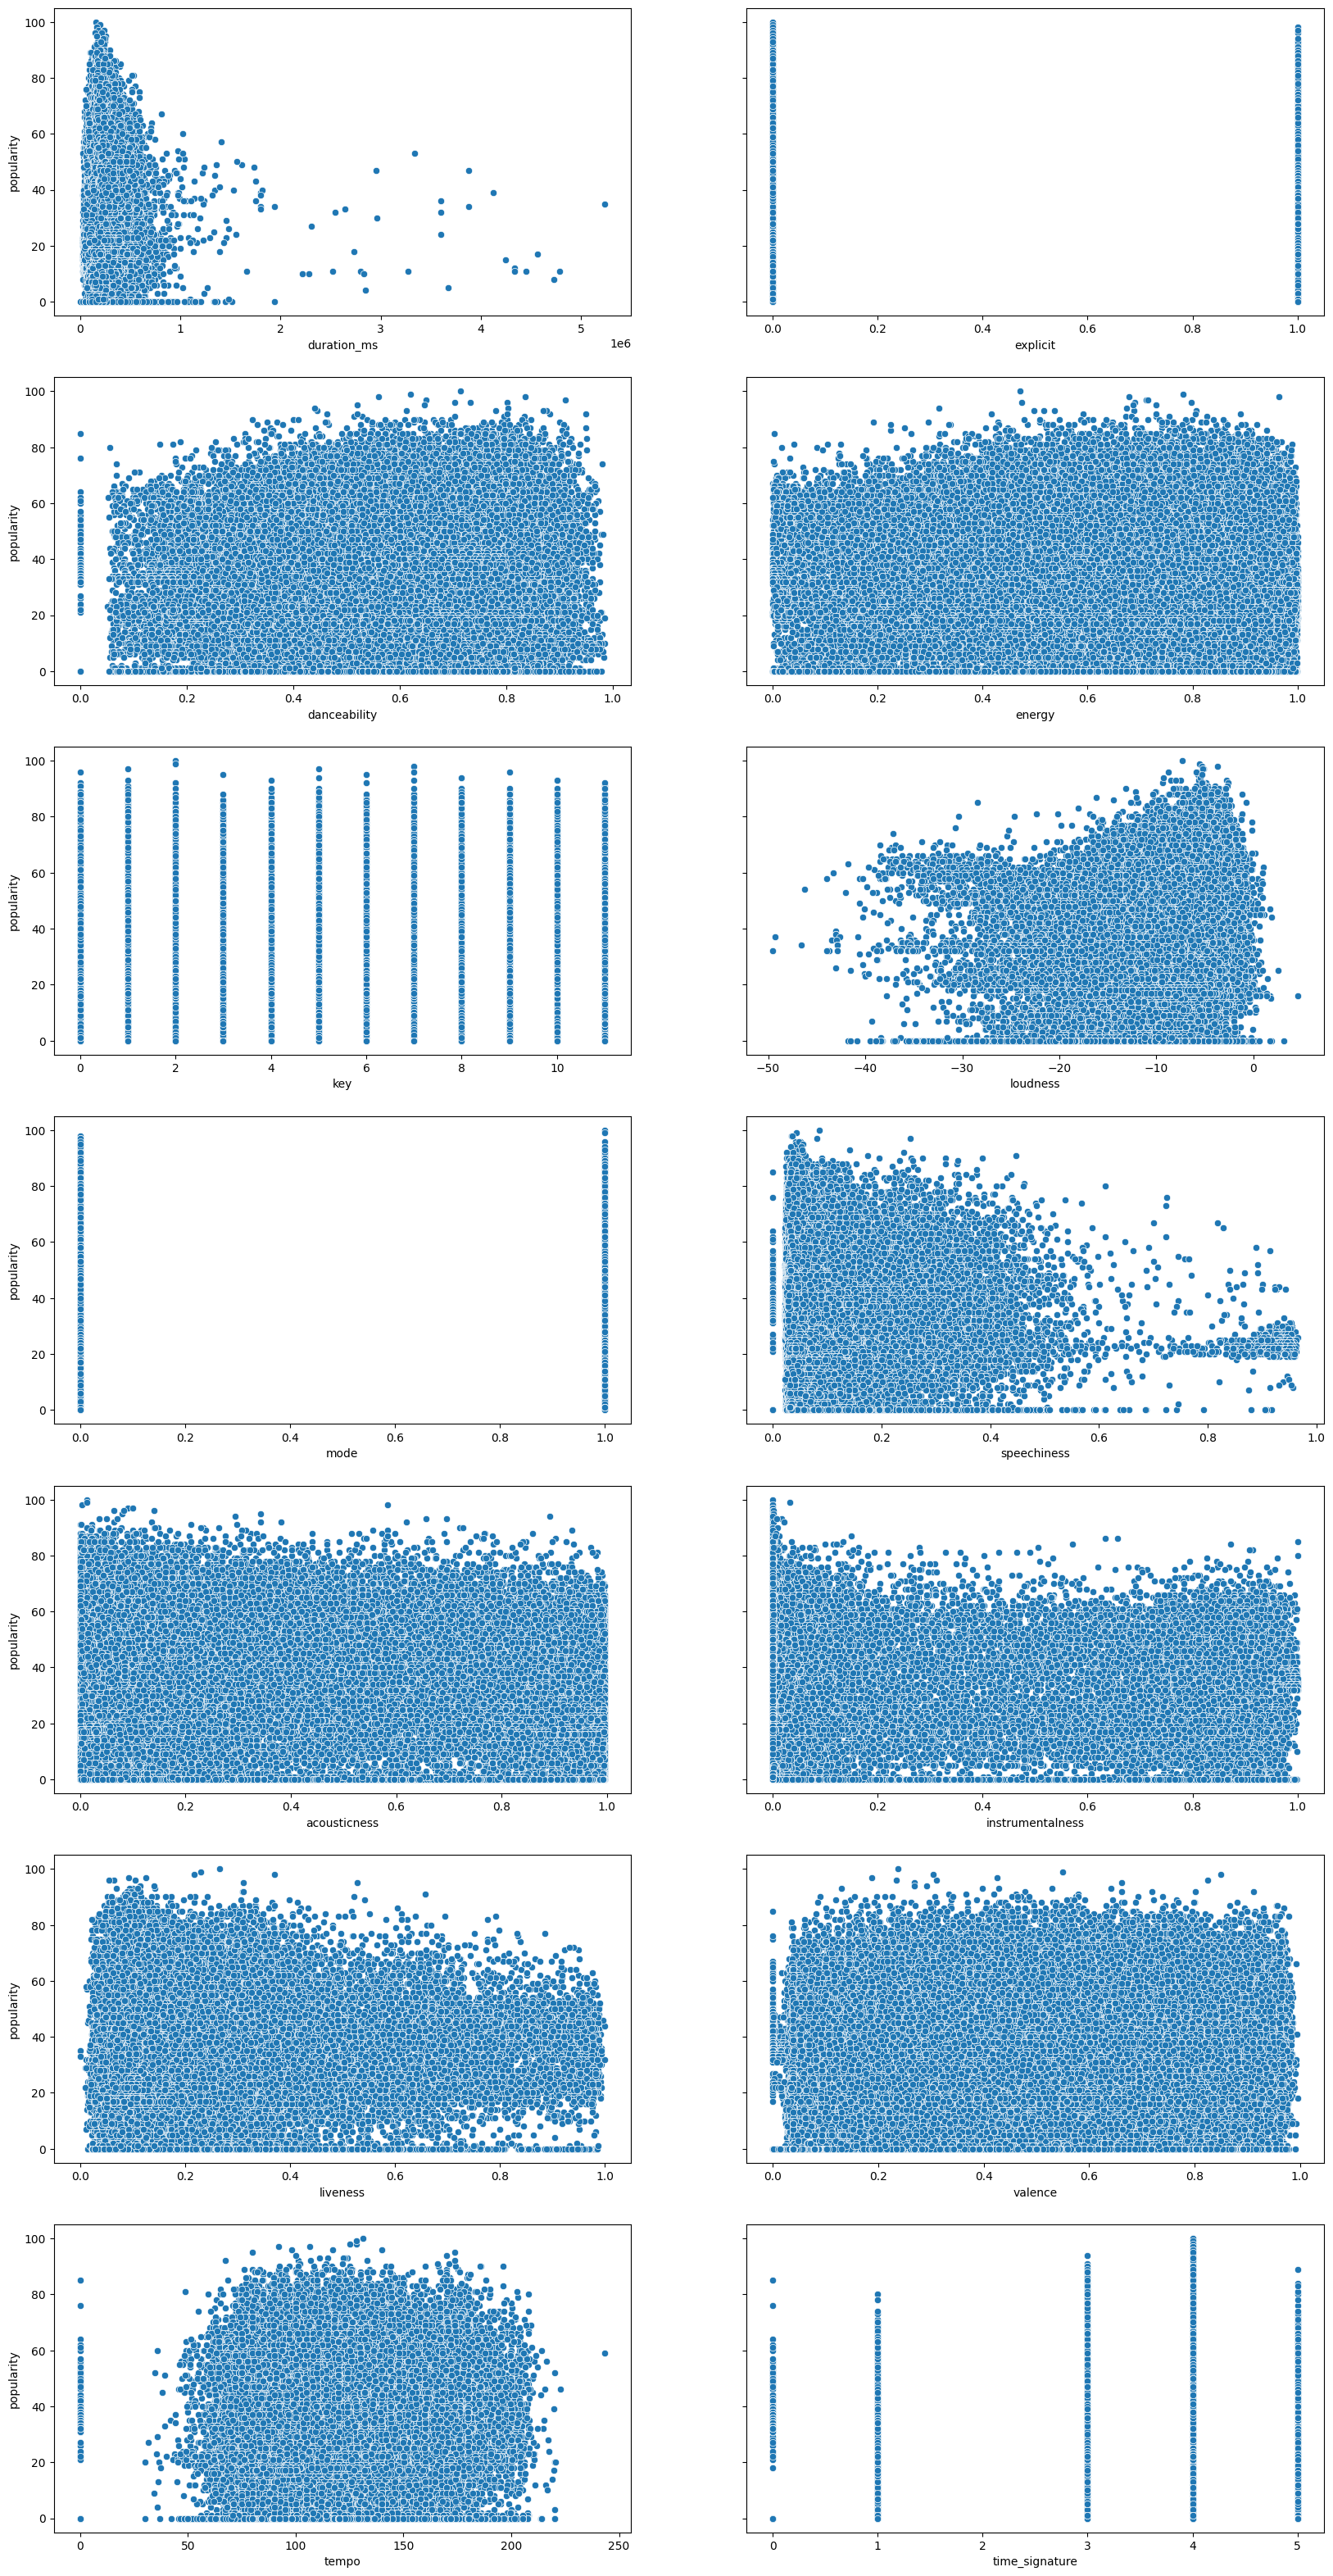

In [24]:
number_of_plots = len(clean_df.columns) - 1
columns_list = list(clean_df.drop('popularity', axis=1).columns)

fig, axes = plt.subplots(number_of_plots//2, 2, figsize=(20, 40), sharey=True)

for i in range(len(columns_list)):
    c = columns_list[i]
    sb.scatterplot(data=clean_df, y='popularity', x=c, ax=axes[i//2, i%2])

- To simplify our model, we decided to use only numerical data for our prediction.
- The imbalanced distribution of data could affect the performance of the model. Therefore, we will use the following techniques to tackle this problem.
    1.  <a href='https://github.com/nickkunz/smogn'> *Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise (SMOGN)* <a/>
    2. <a href='http://dir.csail.mit.edu/'> *Deep Imbalanced Regression (DIR)* <a/>

---

## SMOGN

In [27]:
clean_df = clean_df.drop(categorical, axis=1)

In [ ]:
def data_smogn(data, Y, thes):
    return smogn.smoter(
        data = data,  
        y = Y,
        samp_method = 'balance',
        rel_thres = thes, 
    )

- The parameter `rel_thres` is the rarity threshold with values between 0 and 1.
- Hyperparameter tuning has been done with this parameter, and we will measure the performance of the model from SMOGN data with `rel_thes` from 0.2 to 0.7

In [28]:
smogn_02_df = pd.read_csv("data/data_smogn_02.csv")
smogn_03_df = pd.read_csv("data/data_smogn_03.csv")
smogn_04_df = pd.read_csv("data/data_smogn_04.csv")
smogn_05_df = pd.read_csv("data/data_smogn_05.csv")
smogn_06_df = pd.read_csv("data/data_smogn_06.csv")
smogn_07_df = pd.read_csv("data/data_smogn_07.csv")

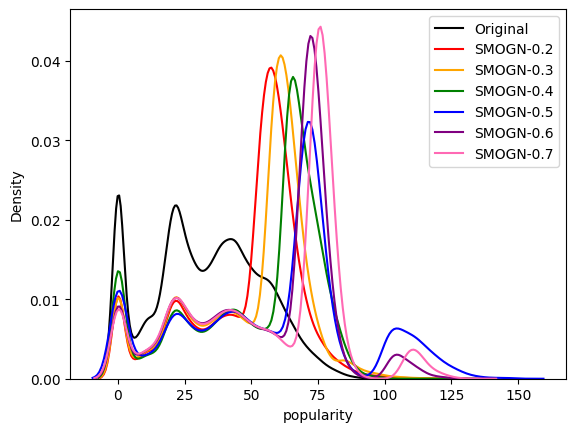

In [33]:
sb.kdeplot(clean_df['popularity'], label = "Original", color='black')
sb.kdeplot(smogn_02_df['popularity'], label = "SMOGN-0.2", color='red')
sb.kdeplot(smogn_03_df['popularity'], label = "SMOGN-0.3", color='orange')
sb.kdeplot(smogn_04_df['popularity'], label = "SMOGN-0.4", color='green')
sb.kdeplot(smogn_05_df['popularity'], label = "SMOGN-0.5", color='blue')
sb.kdeplot(smogn_06_df['popularity'], label = "SMOGN-0.6", color='purple')
sb.kdeplot(smogn_07_df['popularity'], label = "SMOGN-0.7", color='hotpink')

plt.legend()

The KDE plot above shows the comparison of `popularity` distribution in our data.

---

## DIR

---

## Conclusion
- We have preprocessed data by excluding duplicate `track_id` and dropping both unstructured and categorical data.
- To deal with the data's imbalanced distribution, *SMOGN* and *DIR* have been applied to our data.
- The next step is to utilize our data (including original data, data after *SMOGN*, and data after *DIR*) for the different regression models in the next notebook.